In [ ]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(123)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from keras.utils import to_categorical


In [ ]:
from keras.datasets import mnist

In [ ]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
X_train=X_train.reshape(X_train.shape[0],28,28,1)
X_test=X_test.reshape(X_test.shape[0],28,28,1)

In [ ]:
def pred(index):
  p =  np.reshape(X_test[index], (-1, 28, 28, 1))
  fig, axes = plt.subplots(1, 1)
  axes.imshow(X_test[index])
  axes.set_title(f"Actual: {np.argmax(y_test[index])}  &  Prediction: {np.argmax(model.predict(p))}")

In [ ]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

In [ ]:
X_train=(X_train-np.mean(X_train))/X_train.std()
X_test=(X_test-np.mean(X_test))/X_test.std()

In [ ]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [ ]:
y_train.shape

(60000, 10)

In [ ]:
num_classes=y_test.shape[1]

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(240,activation='elu'))
model.add(Dense(num_classes,activation='softmax'))
print(model.output_shape)


(None, 10)


In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=5,batch_size=60)

Epoch 1/5
1000/1000 [==============================] - 56s 55ms/step - loss: 0.1571 - accuracy: 0.9512 - val_loss: 0.0673 - val_accuracy: 0.9788
Epoch 2/5
1000/1000 [==============================] - 49s 49ms/step - loss: 0.0638 - accuracy: 0.9796 - val_loss: 0.0499 - val_accuracy: 0.9823
Epoch 3/5
1000/1000 [==============================] - 53s 53ms/step - loss: 0.0432 - accuracy: 0.9860 - val_loss: 0.0437 - val_accuracy: 0.9858
Epoch 4/5
1000/1000 [==============================] - 48s 48ms/step - loss: 0.0307 - accuracy: 0.9901 - val_loss: 0.0441 - val_accuracy: 0.9862
Epoch 5/5
1000/1000 [==============================] - 49s 49ms/step - loss: 0.0250 - accuracy: 0.9919 - val_loss: 0.0363 - val_accuracy: 0.9877


In [ ]:
scores=model.evaluate(X_test,y_test,verbose=0)
scores

In [ ]:
print("CNN error:{:.2f}".format(100-scores[1]*100))

CNN error:1.23


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=5,batch_size=1000)

Epoch 1/5
60/60 [==============================] - 45s 717ms/step - loss: 0.4173 - accuracy: 0.8699 - val_loss: 0.1688 - val_accuracy: 0.9510
Epoch 2/5
60/60 [==============================] - 39s 653ms/step - loss: 0.1432 - accuracy: 0.9581 - val_loss: 0.0973 - val_accuracy: 0.9700
Epoch 3/5
60/60 [==============================] - 42s 700ms/step - loss: 0.0938 - accuracy: 0.9726 - val_loss: 0.0679 - val_accuracy: 0.9786
Epoch 4/5
60/60 [==============================] - 41s 678ms/step - loss: 0.0745 - accuracy: 0.9775 - val_loss: 0.0589 - val_accuracy: 0.9804
Epoch 5/5
60/60 [==============================] - 38s 630ms/step - loss: 0.0635 - accuracy: 0.9809 - val_loss: 0.0595 - val_accuracy: 0.9812


In [ ]:
scoresbs=model.evaluate(X_test,y_test,verbose=1)
scoresbs

313/313 [==============================] - 4s 12ms/step - loss: 0.0595 - accuracy: 0.9812


[0.0594957135617733, 0.9811999797821045]

In [ ]:
print("CNN error:{:.2f}".format(100-scoresbs[1]*100))

CNN error:1.11


1/1 [==============================] - 0s 132ms/step


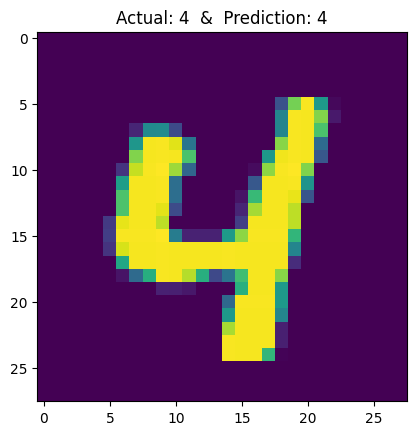

In [ ]:
pred(248)